In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# <p style="background-color:#E598D8;font-family:newtimeroman;color:#E1F16B;font-size:150%;text-align:center;border-radius:20px 60px;">SPAM OR HAM</p>

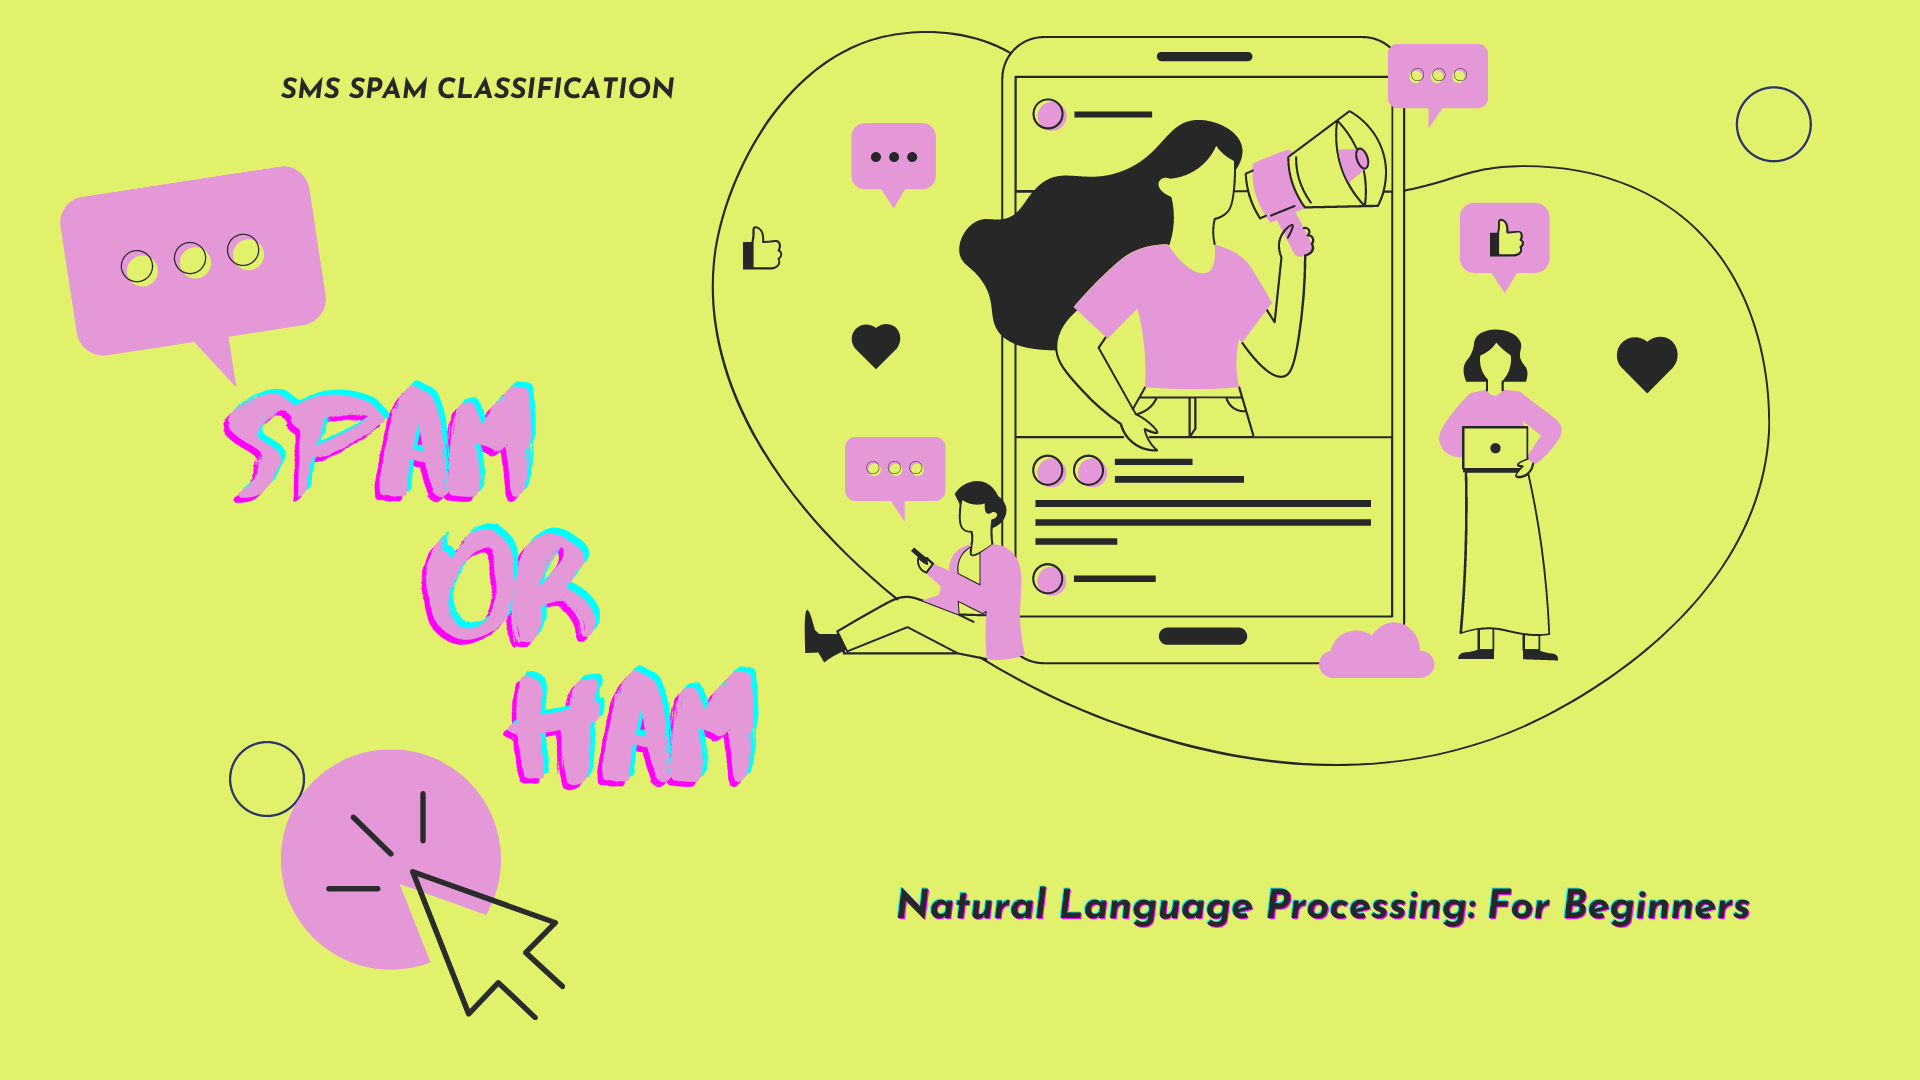

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#E598D8;font-family:newtimeroman;color:#E1F16B;font-size:150%;text-align:center;border-radius:20px 60px;">TABLE OF CONTENTS</p>   
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
    
* [3. DATA EXPLORATION](#3)
    * [3.1 FEATURE ENGINEERING](#3.1)
    * [3.2 OUTLIER DETECTION](#3.2)
    
    
* [4. DATA PREPREPROCESSING](#4)
    
    * [4.1 CLEANING TEXT](#4.1)
    * [4.2 TOKENIZATION](#4.2)
    * [4.3 REMOVING STOPWORDS](#4.3)
    * [4.4 LEMMATIZATION](#4.4) 
    
    
* [5. VECTORIZATION](#5) 
      
* [6. MODEL BUILDING](#6)
    
* [7. EVALUATING MODELS](#7)
    
* [8. END](#8)

<p style="background-color:#E1F16B;font-family:newtimeroman;color:#E598D8;font-size:150%;text-align:center;border-radius:20px 60px;">START</p>

 <a id="1"></a>
# <p style="background-color:#E598D8;font-family:newtimeroman;color:#E1F16B;font-size:150%;text-align:center;border-radius:20px 60px;">IMPORTING LIBRARIES</p>

In [61]:
#Importing all the libraries to be used
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline    
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

<a id="2"></a>
# <p style="background-color:#E598D8;font-family:newtimeroman;color:#E1F16B;font-size:150%;text-align:center;border-radius:20px 60px;">LOADING DATA</p>

In [62]:
#Loading data
data = pd.read_csv("../data/training data/final_merged_dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   phone       5570 non-null   object 
 1   email       5570 non-null   object 
 2   name        5570 non-null   object 
 3   age         5570 non-null   float64
 4   v1          5572 non-null   object 
 5   v2          5572 non-null   object 
 6   Unnamed: 2  50 non-null     object 
 7   Unnamed: 3  12 non-null     object 
 8   Unnamed: 4  6 non-null      object 
dtypes: float64(1), object(8)
memory usage: 391.9+ KB


In [63]:
# Dropping the redundent looking collumns (for this project)
to_drop = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
data = data.drop(data[to_drop], axis=1)
# Renaming the columns because I feel fancy today 
data.rename(columns = {"v1":"Target", "v2":"Text"}, inplace = True)
data.head()

,phone,email,name,age,Target,Text
0,298-598-3142,dcobleigh0@narod.ru,Debbie Cobleigh,79.0,ham,"Go until jurong point, crazy.. Available only ..."
1,580-220-1043,tghelardi1@purevolume.com,Thacher Ghelardi,30.0,ham,Ok lar... Joking wif u oni...
2,652-576-2335,mboxen2@shareasale.com,Mariquilla Boxen,72.0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,550-482-8459,mburgisi3@chron.com,Marcelle Burgisi,26.0,ham,U dun say so early hor... U c already then say...
4,820-694-9474,gdi4@myspace.com,Grange Di Lucia,24.0,ham,"Nah I don't think he goes to usf, he lives aro..."




<a id="3"></a>
# <p style="background-color:#E598D8;font-family:newtimeroman;color:#E1F16B;font-size:150%;text-align:center;border-radius:20px 60px;">DATA EXPLORATION</p>

/var/folders/r0/ss55l5wd3hz4dn6m9d460d2c0000gn/T/ipykernel_8038/4221076156.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg = sns.countplot(x= data["Target"], palette= cols)


Text(0, 0.5, 'Number of Data points')

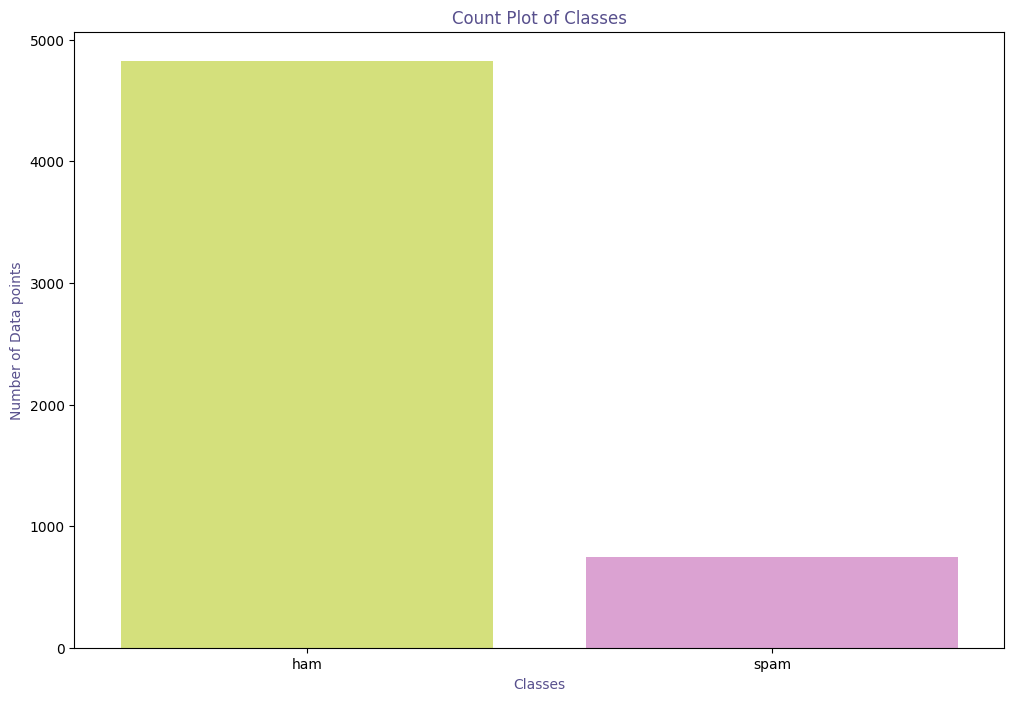

In [64]:
#Palette
cols= ["#E1F16B", "#E598D8"] 
#first of all let us evaluate the target and find out if our data is imbalanced or not
plt.figure(figsize=(12,8))
fg = sns.countplot(x= data["Target"], palette= cols)
fg.set_title("Count Plot of Classes", color="#58508d")
fg.set_xlabel("Classes", color="#58508d")
fg.set_ylabel("Number of Data points", color="#58508d")

**Note:** From the above countplot the data imbalance is quite evident. 

<a id="3.1"></a>
# <p style="background-color:#E1F16B;font-family:newtimeroman;color:#E598D8;text-align:center;font-size:80%;border-radius:20px 60px;">FEATURE ENGINEERING</p>

For the purpose of data exploration, I am creating new features 

* No_of_Characters: Number of characters in the text message
* No_of_Words: Number of words in the text message
* No_of_sentence: Number of sentences in the text message  

In [65]:
#Adding a column of numbers of charachters,words and sentences in each msg
data["No_of_Characters"] = data["Text"].apply(len)
data["No_of_Words"]=data.apply(lambda row: nltk.word_tokenize(row["Text"]), axis=1).apply(len)
data["No_of_sentence"]=data.apply(lambda row: nltk.sent_tokenize(row["Text"]), axis=1).apply(len)

data.describe().T

#PS. At this step, I tokenised the words and sentences and used the length of the same. 
#More on Tokenizing later in the notebook.

,count,mean,std,min,25%,50%,75%,max
age,5570.0,51.334650,18.920813,16.0,36.0,51.0,66.0,90.0
No_of_Characters,5572.0,80.118808,59.690841,2.0,36.0,61.0,121.0,910.0
No_of_Words,5572.0,18.699390,13.741932,1.0,9.0,15.0,27.0,220.0
No_of_sentence,5572.0,1.996411,1.520159,1.0,1.0,1.5,2.0,38.0


<Figure size 1200x800 with 0 Axes>

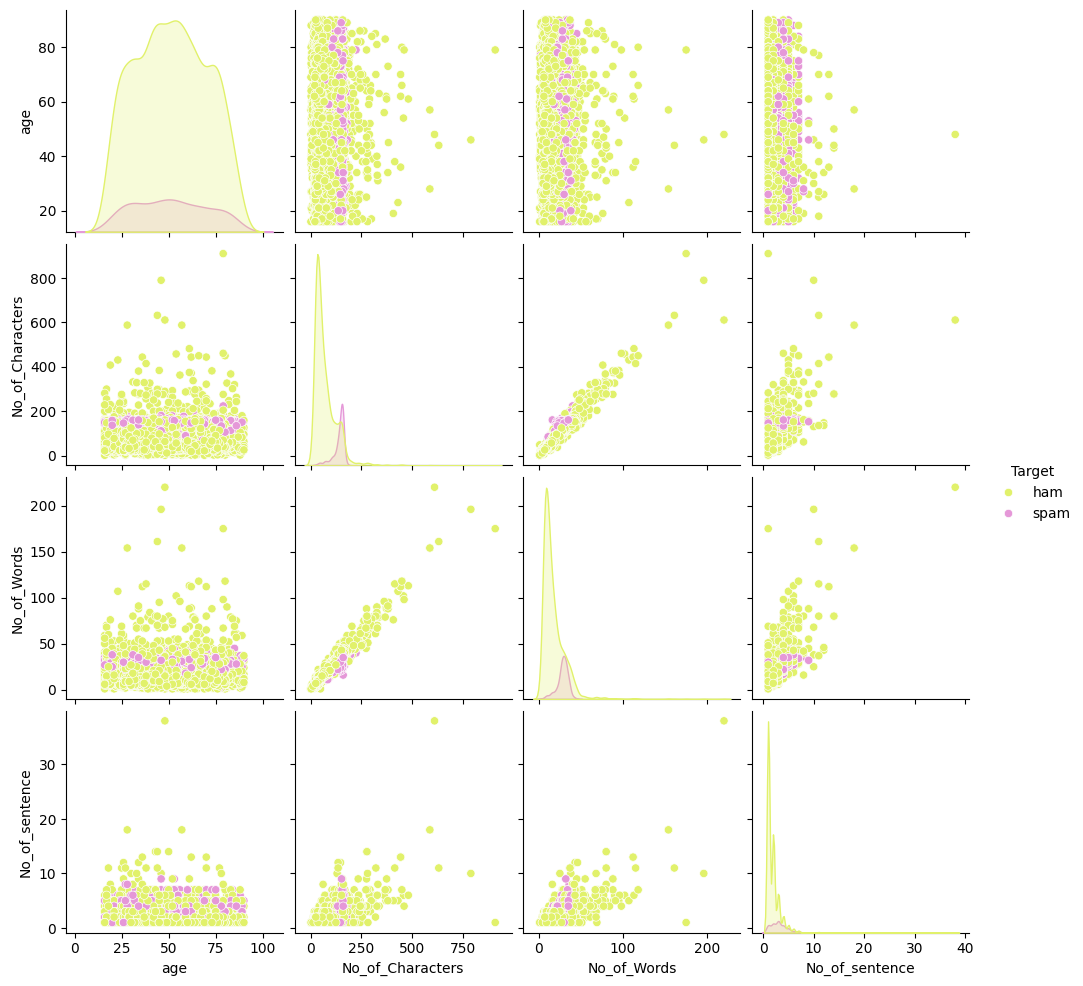

In [66]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="Target",palette=cols)
plt.show(fg)


<a id="3.2"></a>
# <p style="background-color:#E1F16B;font-family:newtimeroman;color:#E598D8;text-align:center;font-size:80%;border-radius:20px 60px;">OUTLIER DETECTION</p>

In [67]:
#Dropping the outliers. 
data = data[(data["No_of_Characters"]<350)]
data.shape

(5548, 9)

<Figure size 1200x800 with 0 Axes>

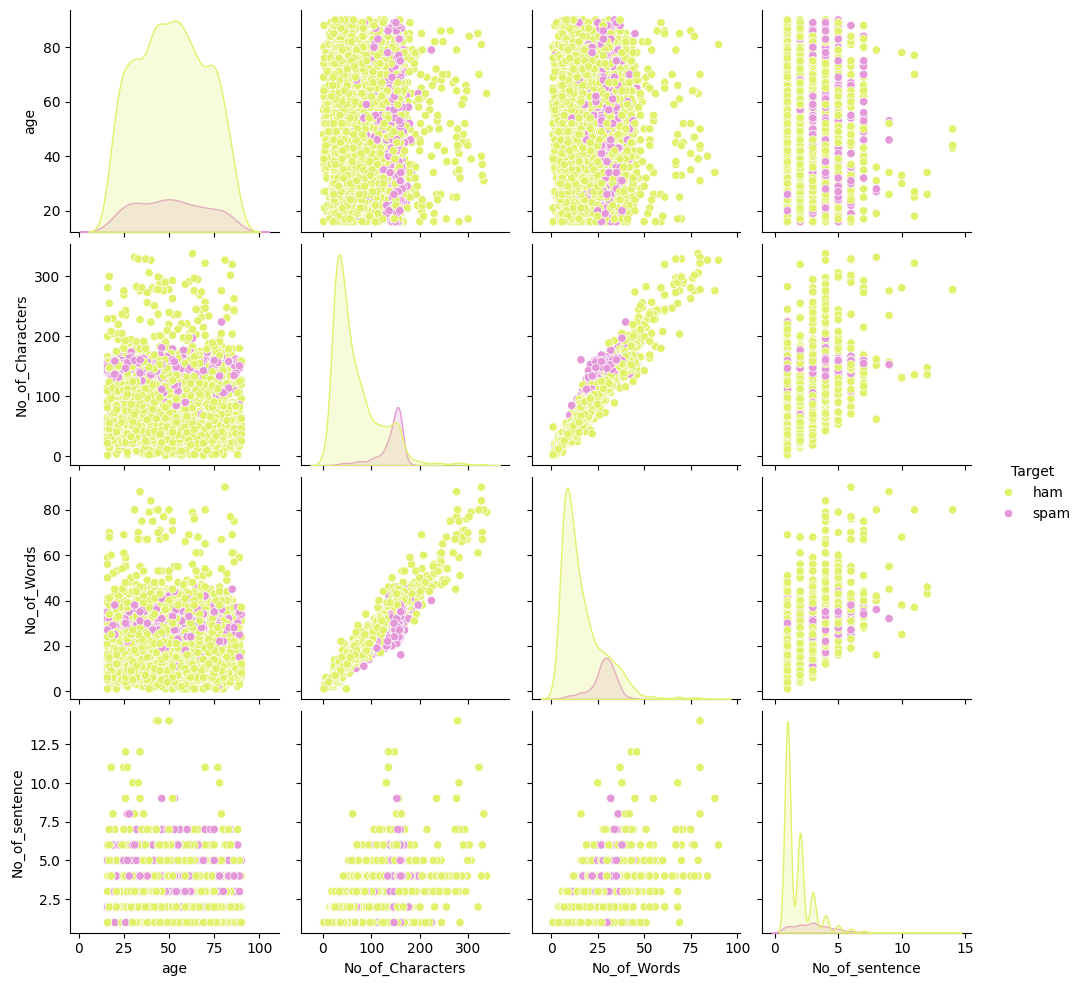

In [68]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="Target",palette=cols)
plt.show(fg)


<a id="4"></a>
# <p style="background-color:#E598D8;font-family:newtimeroman;color:#E1F16B;font-size:150%;text-align:center;border-radius:20px 60px;">DATA PREPREPROCESSING</p>

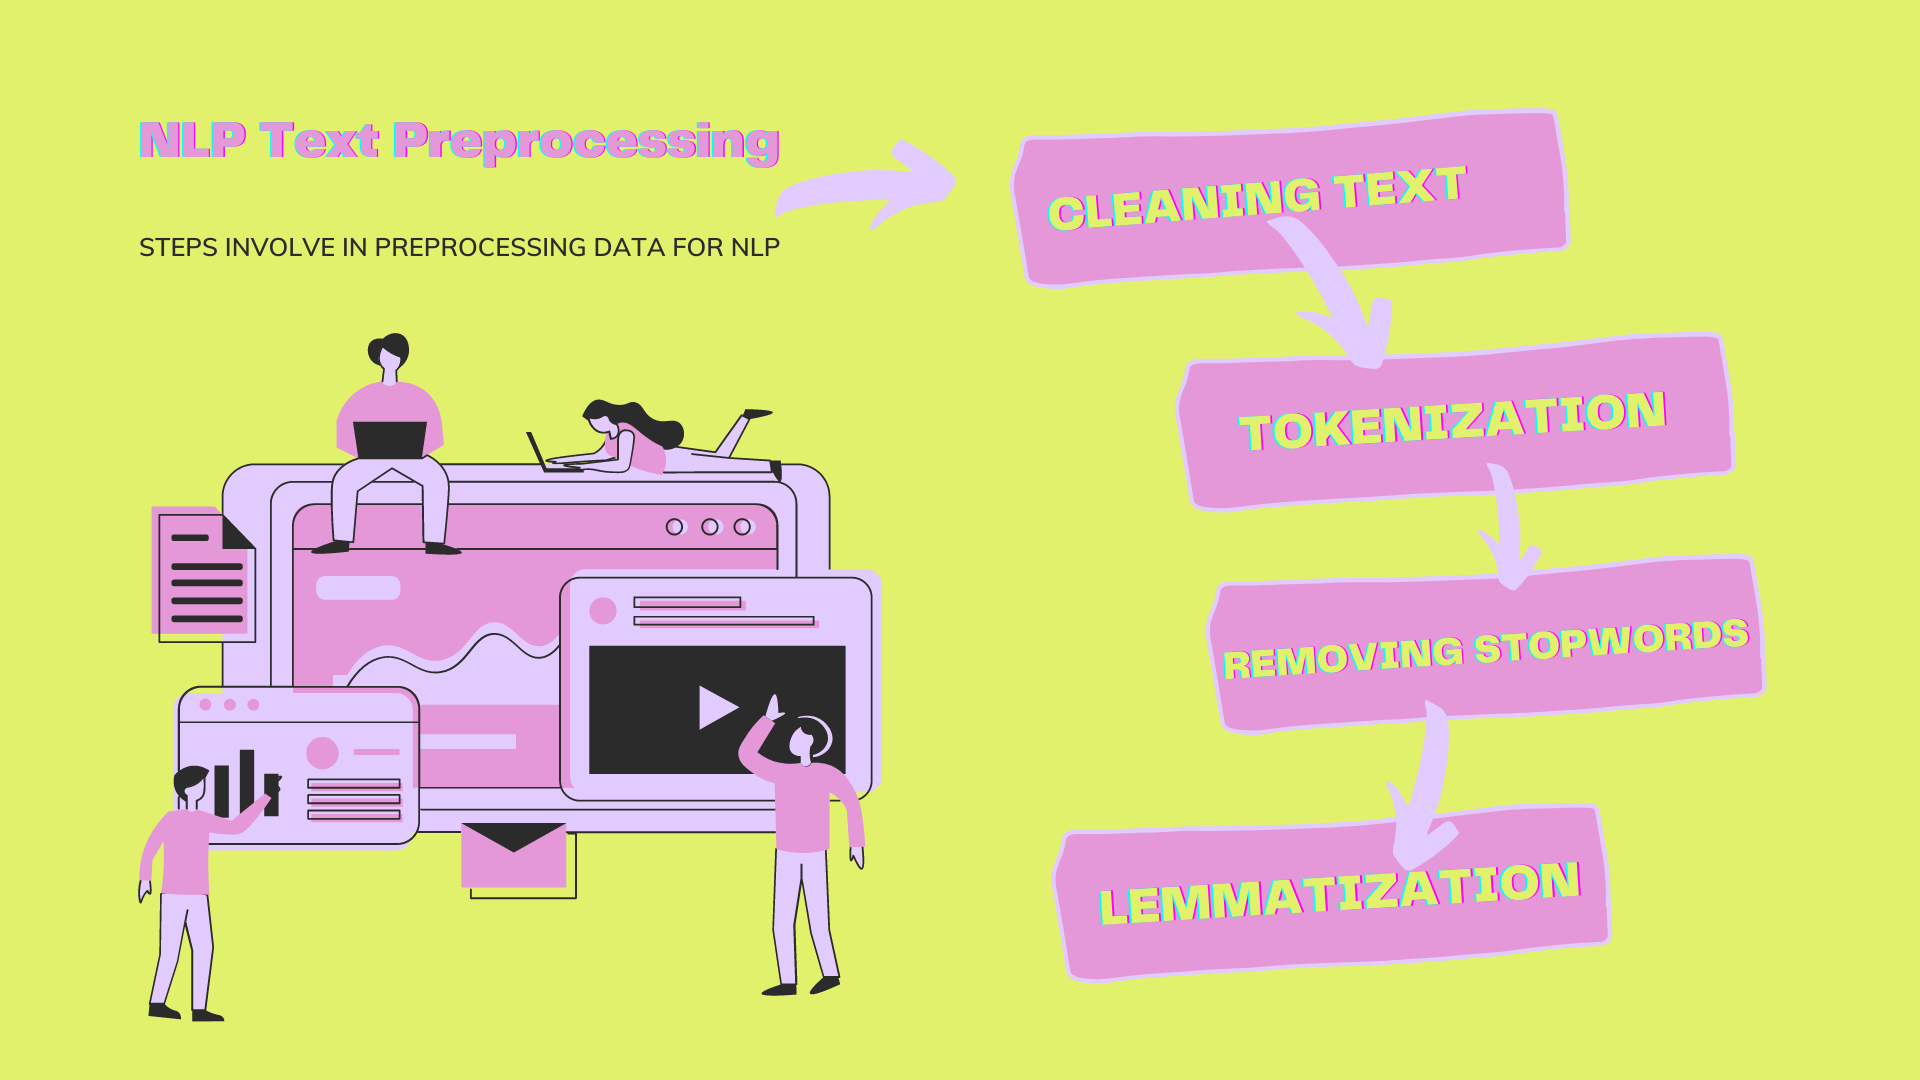

<a id="4.1"></a>
# <p style="background-color:#E1F16B;font-family:newtimeroman;color:#E598D8;text-align:center;font-size:80%;border-radius:20px 60px;">CLEANING TEXT</p>

The data cleaning process NLP is crucial. The computer doesn’t understand the text. for the computer, it is just a cluster of symbols. To further process the data we need to make the data cleaner. 

* In the first step we extract only the alphabetic characters by this we are removing punctuation and numbers. 
* In the next step, we are converting all the characters into lowercase. 

This text will be then used in further procrssing

In [69]:
#Lets have a look at a sample of texts before cleaning
print("\033[1m\u001b[45;1m The First 5 Texts:\033[0m",*data["Text"][:5], sep = "\n")

 The First 5 Texts:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though


In [70]:
# Defining a function to clean up the text
def Clean(Text):
    sms = re.sub('[^a-zA-Z]', ' ', Text) #Replacing all non-alphabetic characters with a space
    sms = sms.lower() #converting to lowecase
    sms = sms.split()
    sms = ' '.join(sms)
    return sms

data["Clean_Text"] = data["Text"].apply(Clean)
#Lets have a look at a sample of texts after cleaning
print("\033[1m\u001b[45;1m The First 5 Texts after cleaning:\033[0m",*data["Clean_Text"][:5], sep = "\n")

 The First 5 Texts after cleaning:
go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
ok lar joking wif u oni
free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
u dun say so early hor u c already then say
nah i don t think he goes to usf he lives around here though


<a id="4.2"></a>
# <p style="background-color:#E1F16B;font-family:newtimeroman;color:#E598D8;text-align:center;font-size:80%;border-radius:20px 60px;">TOKENIZATION</p>

**Tokenization** is breaking complex data into smaller units called tokens. It can be done by splitting paragraphs into sentences and sentences into words. 
I am splitting the Clean_Text into words at this step.

In [71]:
data["Tokenize_Text"]=data.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)

print("\033[1m\u001b[45;1m The First 5 Texts after Tokenizing:\033[0m",*data["Tokenize_Text"][:5], sep = "\n")

 The First 5 Texts after Tokenizing:
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', 'over', 's']
['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']
['nah', 'i', 'don', 't', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']


<a id="4.3"></a>
# <p style="background-color:#E1F16B;font-family:newtimeroman;color:#E598D8;text-align:center;font-size:80%;border-radius:20px 60px;">REMOVING STOPWORDS</p>

**Stopwords** are frequently occurring words(*such as few, is, an, etc*). These words hold meaning in sentence structure, but do not contribute much to language processing in NLP. For the purpose of removing redundancy in our processing, I am removing those. NLTK library has a set of default stopwords that we will be removing. 

In [72]:
# Removing the stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

data["Nostopword_Text"] = data["Tokenize_Text"].apply(remove_stopwords)

print("\033[1m\u001b[45;1m The First 5 Texts after removing the stopwords:\033[0m",*data["Nostopword_Text"][:5], sep = "\n")

 The First 5 Texts after removing the stopwords:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']


<a id="4.4"></a>
# <p style="background-color:#E1F16B;font-family:newtimeroman;color:#E598D8;text-align:center;font-size:80%;border-radius:20px 60px;">LEMMATIZATION</p>

**Stemming** is the process of getting the root form of a word. Stem or root is the part to which inflectional affixes are added. The stem of a word is created by removing the prefix or suffix of a word. It goes back to the etymology of the word. Languages evolve over time. Many different languages branch into each other; for example, English is a derivative of Latin. Thus, stemming a word takes it back to the root word. 

**lemmatization** also converts a word to its root form. However, the difference is that lemmatization ensures that the root word belongs to the language one is dealing with, in our case it is English. If we use lemmatization the output would be in English. 

In [73]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bhaveshthadhani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [74]:
lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    #word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

data["Lemmatized_Text"] = data["Nostopword_Text"].apply(lemmatize_word)
print("\033[1m\u001b[45;1m The First 5 Texts after lemitization:\033[0m",*data["Lemmatized_Text"][:5], sep = "\n")

 The First 5 Texts after lemitization:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'get', 'amore', 'wat']
['ok', 'lar', 'joke', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'go', 'usf', 'live', 'around', 'though']


<a id="5"></a>
# <p style="background-color:#E598D8;font-family:newtimeroman;font-size:150%;color:#E1F16B;text-align:center;border-radius:20px 60px;">VECTORIZE</p>

**TF-IDF** in NLP stands for Term Frequency – Inverse document frequency. In NLP cleaned data needs to be converted into a numerical format where each word is represented by a matrix. This is also known as word embedding or Word vectorization.

Term Frequency (TF) = (Frequency of a term in the document)/(Total number of terms in documents)
Inverse Document Frequency(IDF) = log( (total number of documents)/(number of documents with term t))
I will be using TfidfVectorizer() to vectorize the preprocessed data. 

**Steps in the Vectorizing:**
* Creating a corpus of lemmatized text
* Converting the corpus in vector form
* Label Encoding the classes in Target
 
*Note: So far we have been stalking up columns in our data for the purpose of explanation*

In [75]:
#Creating a corpus of text feature to encode further into vectorized form
corpus= []
for i in data["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)
    
corpus[:5]
print("\033[1m\u001b[45;1m The First 5 lines in corpus :\033[0m",*corpus[:5], sep = "\n")

 The First 5 lines in corpus :
go jurong point crazy available bugis n great world la e buffet cine get amore wat
ok lar joke wif u oni
free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply
u dun say early hor u c already say
nah think go usf live around though


In [76]:
#Changing text data in to numbers. 
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
#Let's have a look at our feature 
X.dtype

dtype('float64')

In [77]:
#Label encode the Target and use it as y
label_encoder = LabelEncoder()
data["Target"] = label_encoder.fit_transform(data["Target"])

<a id="6"></a>
# <p style="background-color:#E598D8;font-family:newtimeroman;font-size:150%;color:#E1F16B;text-align:center;border-radius:20px 60px;">MODEL BUILDING</p>

**Steps involved in the Model Building**
* Setting up features and target as X and y
* Splitting the testing and training sets
* Build a pipeline of model for four different classifiers.
  1. Naïve Bayes
  2. RandomForestClassifier
  3. KNeighborsClassifier
  4. Support Vector Machines
* Fit all the models on training data
* Get the cross-validation on the training set for all the models for accuracy

In [78]:
#Setting values for labels and feature as y and X(we already did X in vectorizing...)
y = data["Target"] 
# Splitting the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
#Testing on the following classifiers
classifiers = [MultinomialNB(), 
               RandomForestClassifier(),
               KNeighborsClassifier(), 
               SVC()]
for cls in classifiers:
    cls.fit(X_train, y_train)

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours",3: "SVC"}

In [80]:
# Cossvalidation 
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

NaiveBayes: 0.967552 
RandomForest: 0.974988 
KNeighbours: 0.911450 
SVC: 0.974086 


<a id="7"></a>
# <p style="background-color:#E598D8;font-family:newtimeroman;font-size:150%;color:#E1F16B;text-align:center;border-radius:20px 60px;">EVALUATING MODELS</p>
**Testing the models on Testset**
* Accuracy Report
* Confusion Matrix

In [81]:
# Model Evaluation
# creating lists of varios scores
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)
    prec = metrics.precision_score(y_test, pred_test)
    recal = metrics.recall_score(y_test, pred_test)
    f1_s = metrics.f1_score(y_test, pred_test)
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)
  
    #Appending scores
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)


In [82]:
# initialise data of lists.
data = {'Precision':precision,
'Recall':recall,
'F1score':f1_score,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
# Creates pandas DataFrame.
Results = pd.DataFrame(data, index =["NaiveBayes", "RandomForest", "KNeighbours","SVC"])

In [83]:
cmap2 = ListedColormap(["#E2CCFF","#E598D8"])
Results.style.background_gradient(cmap=cmap2)

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
NaiveBayes,1.000000,0.705882,0.827586,0.974775,0.997521
RandomForest,1.000000,0.801471,0.889796,0.974775,0.997521
KNeighbours,0.977778,0.323529,0.486188,0.974775,0.997521
SVC,0.990909,0.801471,0.886179,0.974775,0.997521


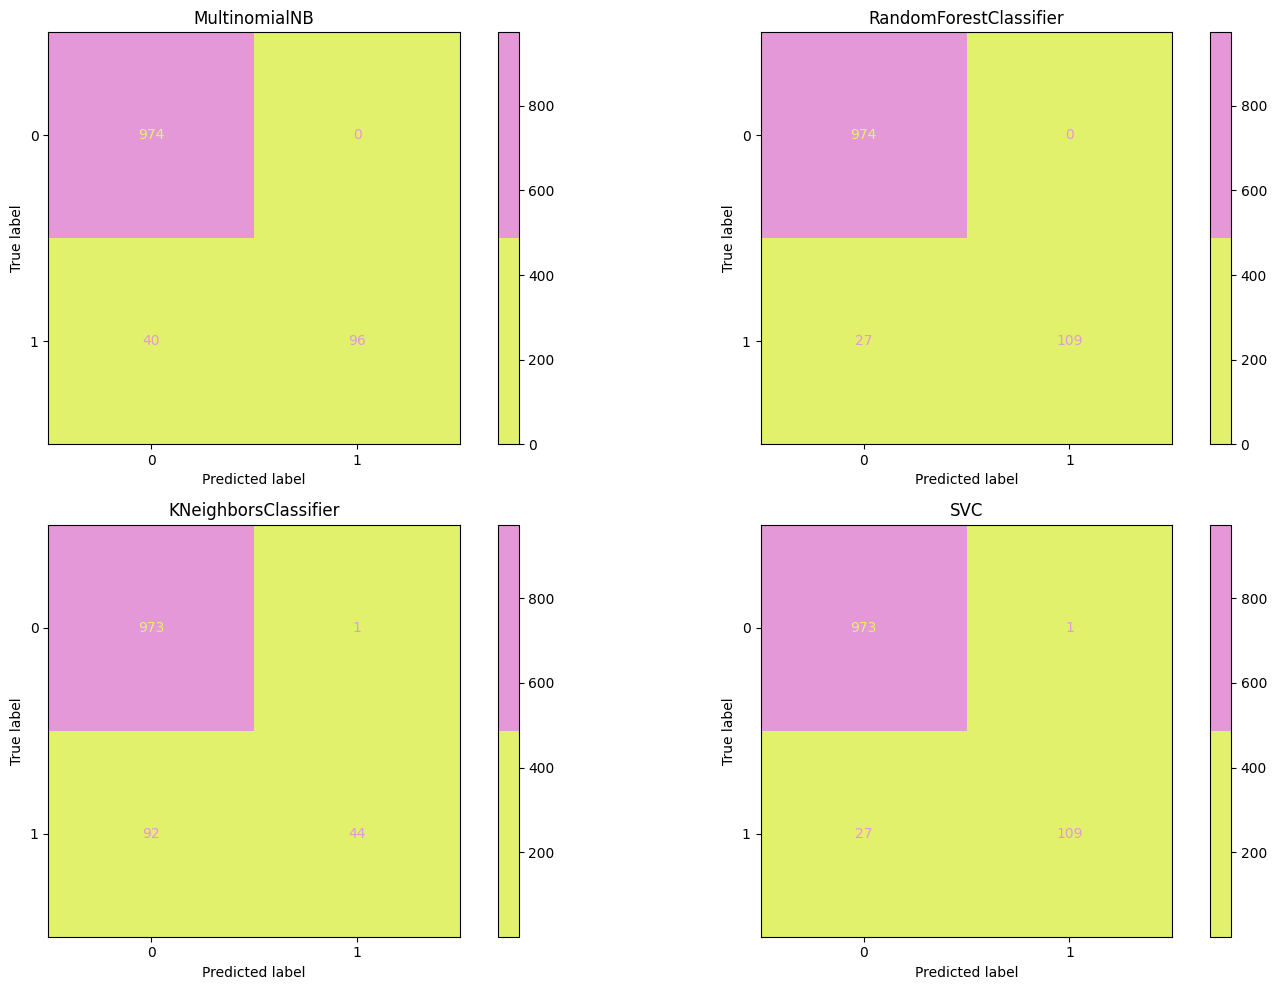

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
cmap = ListedColormap(["#E1F16B", "#E598D8"])

for cls, ax in zip(classifiers, axes.flatten()):
    # Generate the confusion matrix
    cm = confusion_matrix(y_test, cls.predict(X_test))
    
    # Create the ConfusionMatrixDisplay instance
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cls.classes_)
    
    # Plot it on the specified axes
    disp.plot(ax=ax, cmap=cmap)
    
    # Set the classifier name as the title
    ax.title.set_text(type(cls).__name__)

plt.tight_layout()
plt.show()




<a id="8"></a>
# <p style="background-color:#E598D8;font-family:newtimeroman;font-size:150%;color:#E1F16B;text-align:center;border-radius:20px 60px;">END</p>